In [3]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
# suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
suppressWarnings(suppressPackageStartupMessages(library(GGally)))
# suppressWarnings(suppressPackageStartupMessages(library(scran)))

In [4]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [5]:
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC

In [6]:
# select day 0 only (iPSC)
sce0 = sce[,sce$day == "day0"]

In [9]:
counts(sce0)[1:5,1:6]

,21672_1#101,21672_1#102,21672_1#103,21672_1#104,21672_1#105,21672_1#106
ENSG00000000003_TSPAN6,60.1532147,285.8210069,33.40210069,36.80886567,2.307274e+01,66.9105053
ENSG00000000419_DPM1,83.9894420,247.0733696,50.69112197,111.03855721,6.546916e+01,69.9280914
ENSG00000000457_SCYL3,0.1464558,0.2744699,0.03393052,0.02807687,2.242447e-04,0.3059507
ENSG00000000460_C1orf112,2.1843675,9.1652954,10.25336268,1.22454737,1.580143e+01,14.3256698
ENSG00000001036_FUCA2,46.3824370,25.9400674,7.03549791,9.43775850,5.383519e+01,0.0000000


In [10]:
bulk <- readRDS("/hps/nobackup/stegle/users/acuomo/merged_bulk_salmon_quant.rds")

In [11]:
length(unique(sce0$donor_long_id))
(unique(sce0$donor_long_id))

[1] 112

[1] "HPSI0114i-zapk_3" "HPSI0214i-wibj_2" "HPSI1013i-jogf_2"
  [4] "HPSI0214i-pelm_3" "HPSI0114i-vass_1" "HPSI0214i-heth_1"
  [7] "HPSI1014i-toss_3" "HPSI0614i-paab_4" "HPSI0414i-oaqd_3"
 [10] "HPSI1013i-sita_1" "HPSI0614i-zoio_2" "HPSI0914i-kajh_3"
 [13] "HPSI0714i-fasu_2" "HPSI0414i-tout_1" "HPSI0714i-iudw_4"
 [16] "HPSI0514i-tavh_2" "HPSI0514i-pulk_1" "HPSI0215i-fawm_2"
 [19] "HPSI0714i-oebj_1" "HPSI0714i-oojs_1" "HPSI0514i-eoxi_6"
 [22] "HPSI0414i-seru_1" "HPSI0614i-guyj_2" "HPSI1014i-qayj_3"
 [25] "HPSI0414i-walu_1" "HPSI1014i-babz_3" "HPSI0114i-iisa_1"
 [28] "HPSI0414i-oikd_2" "HPSI1014i-quls_2" "HPSI0514i-sohd_3"
 [31] "HPSI0514i-letw_1" "HPSI0215i-oilg_3" "HPSI0514i-rutc_2"
 [34] "HPSI0115i-vazt_1" "HPSI0614i-oicx_6" "HPSI1113i-wahn_1"
 [37] "HPSI1014i-sehl_6" "HPSI0914i-suop_5" "HPSI0715i-aowh_2"
 [40] "HPSI0314i-cuhk_2" "HPSI0613i-hegp_3" "HPSI0713i-cicb_2"
 [43] "HPSI0614i-lepk_1" "HPSI0713i-veku_2" "HPSI0613i-ueah_1"
 [46] "HPSI0414i-naju_1" "HPSI0913i-lise_3" "HPSI0214i-eiwy_1"
 [49] "HPSI0514i-puie_5" "HPSI0115i-qoog_4" "HPSI0914i-zerv_8"
 [52] "HPSI0114i-kolf_2" "HPSI0514i-uenn_3" "HPSI0914i-iezw_2"
 [55] "HPSI0114i-wegi_1" "HPSI0314i-sojd_3" "HPSI1213i-tolg_6"
 [58] "HPSI0214i-rayr_1" "HPSI0314i-qaqx_1" "HPSI1013i-yemz_1"
 [61] "HPSI1013i-wuye_2" "HPSI0114i-joxm_1" "HPSI0214i-kucg_2"
 [64] "HPSI0114i-iisa_3" "HPSI0114i-bezi_1" "HPSI1014i-kefb_1"
 [67] "HPSI1014i-nosn_6" "HPSI1213i-pahc_4" "HPSI0414i-xojn_3"
 [70] "HPSI0314i-hoik_1" "HPSI0114i-eipl_1" "HPSI0215i-yoch_6"
 [73] "HPSI1113i-hayt_1" "HPSI1014i-eesb_1" "HPSI1013i-kuxp_1"
 [76] "HPSI0514i-yelp_3" "HPSI0614i-qunz_3" "HPSI0115i-aoxv_3"
 [79] "HPSI0115i-melw_2" "HPSI0714i-pipw_5" "HPSI1014i-juuy_2"
 [82] "HPSI0914i-jejf_2" "HPSI0914i-qehq_3" "HPSI0614i-uilk_3"
 [85] "HPSI0514i-toco_5" "HPSI1113i-hajc_1" "HPSI0514i-kuco_1"
 [88] "HPSI0115i-hecn_3" "HPSI0614i-liqa_1" "HPSI0514i-tert_1"
 [91] "HPSI0614i-ciwj_2" "HPSI0214i-poih_4" "HPSI0115i-iiyk_4"
 [94] "HPSI0614i-miaj_6" "HPSI0914i-laey_4" "HPSI0715i-meue_4"
 [97] "HPSI1014i-vils_1" "HPSI0714i-keui_1" "HPSI0514i-naah_2"
[100] "HPSI0513i-oibg_1" "HPSI0713i-nocf_2" "HPSI0813i-guss_1"
[103] "HPSI0414i-mita_2" "HPSI0214i-datg_2" "HPSI1113i-qorq_2"
[106] "HPSI0214i-feec_2" "HPSI0413i-nudd_1" "HPSI0814i-bokz_5"
[109] "HPSI0314i-wigw_2" "HPSI1013i-zagm_1" "HPSI0513i-fejf_2"
[112] "HPSI0714i-nufh_3"

In [8]:
# cpm_bulk <- counts(bulk)
# newcols <- gsub(".*/quant_salmon/*","",colnames(cpm_bulk))
# cols <- gsub("*.hs.*","",newcols)
# colnames(cpm_bulk) <- cols
# cpm_bulk_sc <- cpm_bulk[rownames(cpm_bulk) %in% rownames(logcounts(sce0)),
#                                      colnames(cpm_bulk) %in% unique(sce0$donor_long_id)]
# cpm_bulk_sc <- cpm_bulk_sc[, !(colnames(cpm_bulk_sc) %in% c("HPSI0713i-cicb_2",
#                                                            "HPSI0713i-cicb_3",
#                                                            "HPSI0513i-uoxz_5"))]
# cpm_bulk_sc <- cpm_bulk_sc[order(rownames(cpm_bulk_sc)), order(colnames(cpm_bulk_sc))]
# dim(cpm_bulk_sc)
# head(cpm_bulk_sc)
# head(log2(cpm_bulk_sc+1))

In [9]:
# cpm_bulk <- edgeR::cpm(counts(bulk))
# newcols <- gsub(".*/quant_salmon/*","",colnames(cpm_bulk))
# cols <- gsub("*.hs.*","",newcols)
# colnames(cpm_bulk) <- cols
# cpm_bulk_sc <- cpm_bulk[rownames(cpm_bulk) %in% rownames(logcounts(sce0)),
#                                      colnames(cpm_bulk) %in% unique(sce0$donor_long_id)]
# cpm_bulk_sc <- cpm_bulk_sc[, !(colnames(cpm_bulk_sc) %in% c("HPSI0713i-cicb_2",
#                                                            "HPSI0713i-cicb_3",
#                                                            "HPSI0513i-uoxz_5"))]
# cpm_bulk_sc <- cpm_bulk_sc[order(rownames(cpm_bulk_sc)), order(colnames(cpm_bulk_sc))]
# dim(cpm_bulk_sc)
# head(cpm_bulk_sc)

In [10]:
# sizeFac <- edgeR::calcNormFactors(counts(bulk))
# totalPerSample <- colSums(counts(bulk))
# totalExpressed_corrected <-  totalPerSample*sizeFac
# totalExpressed_corrected <- totalExpressed_corrected/1e6
# expr <- sweep(counts(bulk), STATS = totalExpressed_corrected, MARGIN = 2, FUN = "/")
# cpm_bulk = log2(expr + 1)
# newcols <- gsub(".*/quant_salmon/*","",colnames(cpm_bulk))
# cols <- gsub("*.hs.*","",newcols)
# colnames(cpm_bulk) <- cols
# cpm_bulk_sc <- cpm_bulk[rownames(cpm_bulk) %in% rownames(logcounts(sce0)),
#                                      colnames(cpm_bulk) %in% unique(sce0$donor_long_id)]
# cpm_bulk_sc <- cpm_bulk_sc[, !(colnames(cpm_bulk_sc) %in% c("HPSI0713i-cicb_2",
#                                                            "HPSI0713i-cicb_3",
#                                                            "HPSI0513i-uoxz_5"))]
# cpm_bulk_sc <- cpm_bulk_sc[order(rownames(cpm_bulk_sc)), order(colnames(cpm_bulk_sc))]
# dim(cpm_bulk_sc)
# head(cpm_bulk_sc)

In [11]:
# options(repr.plot.width = 6, repr.plot.height = 4)
# hist(sizeFac)

In [12]:
# cpm_bulk = log2(scater::calculateCPM(bulk, use.size.factors = FALSE) + 1)
# newcols <- gsub(".*/quant_salmon/*","",colnames(cpm_bulk))
# cols <- gsub("*.hs.*","",newcols)
# colnames(cpm_bulk) <- cols
# cpm_bulk_sc <- cpm_bulk[rownames(cpm_bulk) %in% rownames(logcounts(sce0)),
#                                      colnames(cpm_bulk) %in% unique(sce0$donor_long_id)]
# cpm_bulk_sc <- cpm_bulk_sc[, !(colnames(cpm_bulk_sc) %in% c("HPSI0713i-cicb_2",
#                                                            "HPSI0713i-cicb_3",
#                                                            "HPSI0513i-uoxz_5"))]
# cpm_bulk_sc <- cpm_bulk_sc[order(rownames(cpm_bulk_sc)), order(colnames(cpm_bulk_sc))]
# dim(cpm_bulk_sc)
# head(cpm_bulk_sc)

In [13]:
# bulk <- readRDS("/hps/nobackup/stegle/users/acuomo/merged_bulk_salmon_quant.rds")
# clusters <- scran::quickCluster(bulk, min.size = 400, method = "igraph",
#                          subset.row = sample(nrow(bulk), size = 3000))
# bulk <- scran::computeSumFactors(bulk, cluster = clusters)
# bulk$size_factor <- sizeFactors(bulk)
# bulk <- normalize(bulk)
# cpm_bulk = logcounts(bulk)
# newcols <- gsub(".*/quant_salmon/*","",colnames(cpm_bulk))
# cols <- gsub("*.hs.*","",newcols)
# colnames(cpm_bulk) <- cols
# cpm_bulk_sc <- cpm_bulk[rownames(cpm_bulk) %in% rownames(logcounts(sce0)),
#                                      colnames(cpm_bulk) %in% unique(sce0$donor_long_id)]
# cpm_bulk_sc <- cpm_bulk_sc[, !(colnames(cpm_bulk_sc) %in% c("HPSI0713i-cicb_2",
#                                                            "HPSI0713i-cicb_3",
#                                                            "HPSI0513i-uoxz_5"))]
# cpm_bulk_sc <- cpm_bulk_sc[order(rownames(cpm_bulk_sc)), order(colnames(cpm_bulk_sc))]
# dim(cpm_bulk_sc)
# head(cpm_bulk_sc)

In [12]:
bulk <- readRDS("/hps/nobackup/stegle/users/acuomo/merged_bulk_salmon_quant.rds")
logcounts(bulk) = log2(scater::calculateCPM(bulk, use.size.factors = FALSE) + 1)
clusters <- scran::quickCluster(bulk, min.size = 400, method = "igraph",
                         subset.row = sample(nrow(bulk), size = 3000))
bulk <- scran::computeSumFactors(bulk, cluster = clusters)
bulk$size_factor <- sizeFactors(bulk)
bulk <- normalize(bulk)
cpm_bulk = logcounts(bulk)
newcols <- gsub(".*/quant_salmon/*","",colnames(cpm_bulk))
cols <- gsub("*.hs.*","",newcols)
colnames(cpm_bulk) <- cols
cpm_bulk_sc <- cpm_bulk[rownames(cpm_bulk) %in% rownames(logcounts(sce0)),
                                     colnames(cpm_bulk) %in% unique(sce0$donor_long_id)]
cpm_bulk_sc <- cpm_bulk_sc[, !(colnames(cpm_bulk_sc) %in% c("HPSI0713i-cicb_2",
                                                           "HPSI0713i-cicb_3",
                                                           "HPSI0513i-uoxz_5"))]
cpm_bulk_sc <- cpm_bulk_sc[order(rownames(cpm_bulk_sc)), order(colnames(cpm_bulk_sc))]
dim(cpm_bulk_sc)
head(cpm_bulk_sc)

[1] 11231   108

,HPSI0114i-bezi_1,HPSI0114i-eipl_1,HPSI0114i-iisa_1,HPSI0114i-iisa_3,HPSI0114i-joxm_1,HPSI0114i-kolf_2,HPSI0114i-vass_1,HPSI0114i-zapk_3,HPSI0115i-aoxv_3,HPSI0115i-hecn_3,⋯,HPSI1014i-qayj_3,HPSI1014i-quls_2,HPSI1014i-sehl_6,HPSI1014i-toss_3,HPSI1014i-vils_1,HPSI1113i-hayt_1,HPSI1113i-qorq_2,HPSI1113i-wahn_1,HPSI1213i-pahc_4,HPSI1213i-tolg_6
ENSG00000000003_TSPAN6,12.176812,11.963390,11.724372,11.581554,11.581938,11.91654,12.139857,11.152724,12.261062,10.044060,⋯,12.07964,12.234894,11.717556,11.673350,12.331023,11.866239,12.172467,11.685514,11.578010,12.016322
ENSG00000000419_DPM1,11.864050,11.814102,11.927771,11.817954,11.626778,12.10929,12.091558,11.746042,11.876539,8.123051,⋯,12.22453,11.929847,11.646900,11.846047,11.947902,12.117426,12.259962,11.999811,11.749118,11.643293
ENSG00000000457_SCYL3,7.723714,8.023246,7.866073,7.867755,7.421912,7.34395,8.222353,7.619009,8.082254,6.249640,⋯,7.78280,7.405192,7.967497,8.136646,7.512881,7.842617,8.121650,7.669196,7.682045,7.391899
ENSG00000000460_C1orf112,9.596536,9.509393,10.096453,10.034637,9.414676,10.13974,9.687183,9.924785,10.130744,8.179875,⋯,10.09128,10.401721,9.994265,9.912758,10.393378,10.291629,9.909019,10.169735,9.301705,10.121883
ENSG00000001036_FUCA2,11.198997,11.284465,10.947548,10.912091,11.010059,11.10432,11.338250,11.034803,11.001663,9.421304,⋯,11.08622,10.635060,10.907802,11.286973,10.844017,11.164671,11.344913,10.915607,10.899160,11.577895
ENSG00000001084_GCLC,9.955284,10.165479,10.235732,10.232780,10.022007,10.69316,10.251111,10.306387,9.982295,7.947766,⋯,10.29425,10.550061,9.874011,10.143488,10.103685,10.232772,10.048331,10.237187,10.101890,9.934450


In [32]:
dir = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/bulk_ipsc_eQTLs/"

In [39]:
write.table(cpm_bulk, paste0(dir,"bulk_exprs_alllines.tsv"), sep = "\t", quote = F, col.names = NA)

In [41]:
dim(cpm_bulk)

[1] 39385   676

In [33]:
write.table(cpm_bulk_sc, paste0(dir,"bulk_exprs.tsv"), sep = "\t", quote = F, col.names = NA)

In [34]:
pcs_bulk = prcomp(t(cpm_bulk_sc))$x[,1:10]
head(pcs_bulk)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
HPSI0114i-bezi_1,-1.752271,23.67747,-14.41534,13.781955,-1.556653,-8.451826,5.805922,-16.5233888,0.2254597,-6.14843453
HPSI0114i-eipl_1,3.061373,10.90175,12.04053,23.407564,18.308701,-10.657293,2.055415,-2.8956086,5.8150673,-9.30376427
HPSI0114i-iisa_1,9.241901,19.46449,-16.61737,-17.620830,6.088501,-8.034418,11.052475,4.4881489,-4.7310868,0.04731545
HPSI0114i-iisa_3,4.880485,13.86131,-14.33556,-13.485245,8.930075,-4.012240,11.301933,6.1937119,4.2536126,-3.32154369
HPSI0114i-joxm_1,-14.457950,16.99571,-15.03030,6.746784,1.032778,-4.974597,17.701296,2.2023274,-3.0294605,0.12356372
HPSI0114i-kolf_2,14.650883,15.88335,2.70087,-36.028663,7.420142,12.299262,2.381522,-0.5241033,7.7827377,-8.10110931


In [35]:
write.table(pcs_bulk, paste0(dir,"bulk_exprs_10pcs_covs.tsv"),sep = "\t", quote = F, col.names = NA)

In [40]:
Mapping_file <- matrix(nrow = nrow(pcs_bulk), ncol = 2)
Mapping_file[,1] <- row.names(pcs_bulk)
Mapping_file[,2] <- row.names(pcs_bulk)
head(Mapping_file)
write.table(Mapping_file, paste0(dir,'bulk_samples.tsv'), sep = "\t", col.names = NA)

HPSI0114i-bezi_1,HPSI0114i-bezi_1
HPSI0114i-eipl_1,HPSI0114i-eipl_1
HPSI0114i-iisa_1,HPSI0114i-iisa_1
HPSI0114i-iisa_3,HPSI0114i-iisa_3
HPSI0114i-joxm_1,HPSI0114i-joxm_1
HPSI0114i-kolf_2,HPSI0114i-kolf_2


In [ ]:
####### down-sampling to sequencing depth comparable to single cells

In [13]:
cpm_bulk_allgenes = counts(bulk)
newcols <- gsub(".*/quant_salmon/*","",colnames(cpm_bulk_allgenes))
cols <- gsub("*.hs.*","",newcols)
colnames(cpm_bulk_allgenes) <- cols

In [14]:
cpm_bulk_allgenes_scsamples <- cpm_bulk_allgenes[,colnames(cpm_bulk_allgenes) %in% unique(sce0$donor_long_id)]

In [15]:
head(cpm_bulk_allgenes)

,HPSI0114i-bezi_1,HPSI0114i-bezi_3,HPSI0114i-eipl_1,HPSI0114i-eipl_3,HPSI0114i-fikt_3,HPSI0114i-iisa_1,HPSI0114i-iisa_3,HPSI0114i-joxm_1,HPSI0114i-kolf_2,HPSI0114i-kolf_3,⋯,HPSI0516i-eitu_4,HPSI0516i-goek_4,HPSI0516i-hapz_2,HPSI0516i-hapz_3,HPSI0516i-iool_4,HPSI0516i-iool_6,HPSI0516i-oazw_3,HPSI0516i-oazw_4,HPSI0516i-pews_2,HPSI0516i-pews_3
ENSG00000000003_TSPAN6,3846.25631,6291.05638,2971.2791,4157.55524,3403.30075,2363.40241,3610.09865,2699.54533,3121.31608,2655.48022,⋯,722.38916,3291.50949,5094.40216,3338.3176,3894.84862,4275.32679,4250.63250,5716.46845,5805.35729,4554.68409
ENSG00000000005_TNMD,82.90442,229.72857,203.7413,139.93106,126.94790,85.56223,134.79670,73.86948,99.47332,107.74167,⋯,16.19598,148.25761,53.25291,140.3685,197.57210,62.13246,212.96536,102.38398,460.21508,81.69777
ENSG00000000419_DPM1,3096.45523,3541.10209,2679.1164,3664.41159,3999.96503,2721.34513,4253.08620,2784.79593,3567.57794,3460.39176,⋯,783.68978,3812.40385,4514.35767,4678.7147,4725.20244,4238.39937,4997.45313,5279.74614,5395.06231,4680.52020
ENSG00000000457_SCYL3,174.80602,290.01557,192.8760,183.47763,189.47968,162.30679,274.05183,150.17575,130.40085,184.27716,⋯,106.61300,178.32273,262.55426,199.6303,224.52463,224.89241,221.57405,313.94256,239.59619,201.29632
ENSG00000000460_C1orf112,642.43642,851.36011,541.6634,850.49635,1062.96472,764.21683,1234.74801,600.32251,910.32090,628.52192,⋯,185.33285,1153.10585,1614.96996,1486.8983,1395.04647,1437.34617,1706.99142,1929.75587,1704.58944,1348.14372
ENSG00000000938_FGR,22.49792,25.27714,19.2920,11.90576,30.83076,18.85456,28.04363,25.44808,22.88955,22.17787,⋯,10.29471,22.66004,35.30419,23.5775,26.98097,19.06929,26.26117,27.44168,15.44898,15.86835


In [16]:
dim(cpm_bulk_allgenes)

[1] 39385   676

Warning message in n * h:
“NAs produced by integer overflow”

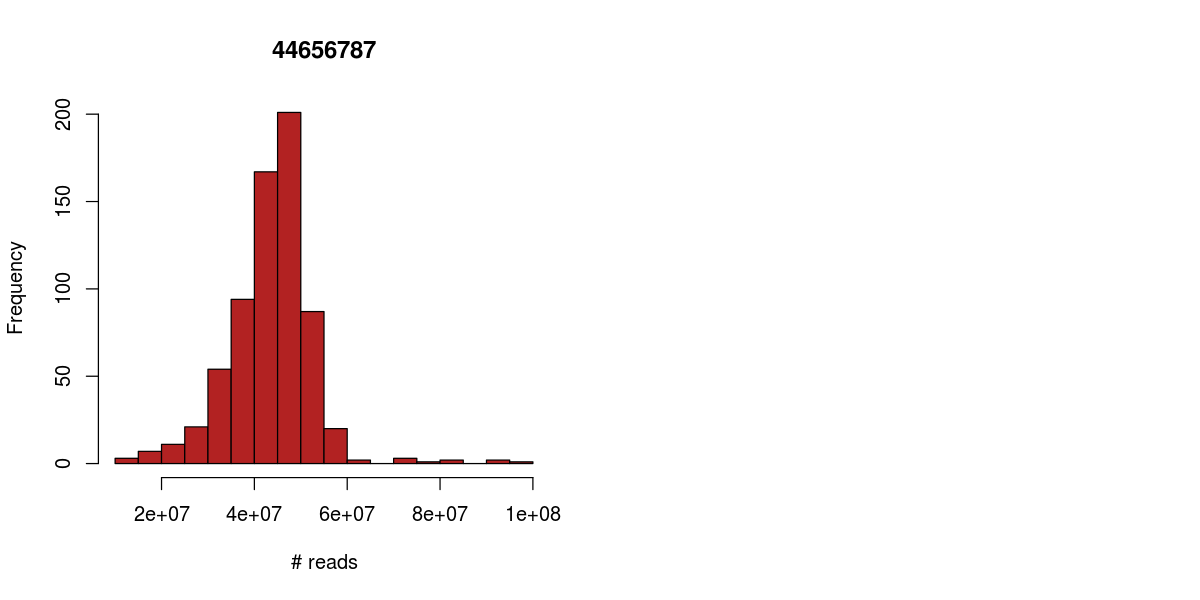

In [17]:
par(mfrow = c(1,2))
options(repr.plot.width = 10, repr.plot.height = 5)
hist(colSums(cpm_bulk_allgenes), main = round(median(colSums(cpm_bulk_allgenes)), digits = 0), 
     col = "firebrick", breaks = 20, xlab = "# reads")

In [18]:
cpm_bulk_allgenes_sc = cpm_bulk_allgenes[,colnames(cpm_bulk_allgenes) %in% unique(sce0$donor_long_id)]

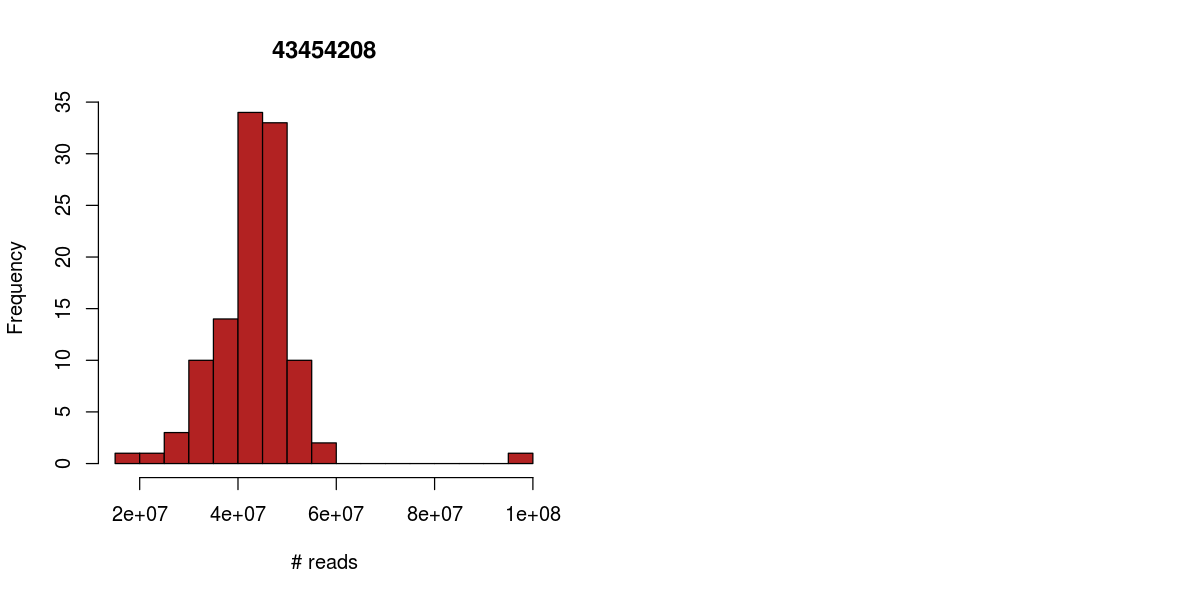

In [19]:
par(mfrow = c(1,2))
options(repr.plot.width = 10, repr.plot.height = 5)
hist(colSums(cpm_bulk_allgenes_sc), main = round(mean(colSums(cpm_bulk_allgenes_sc)), digits = 0), 
     col = "firebrick", breaks = 20, xlab = "# reads")

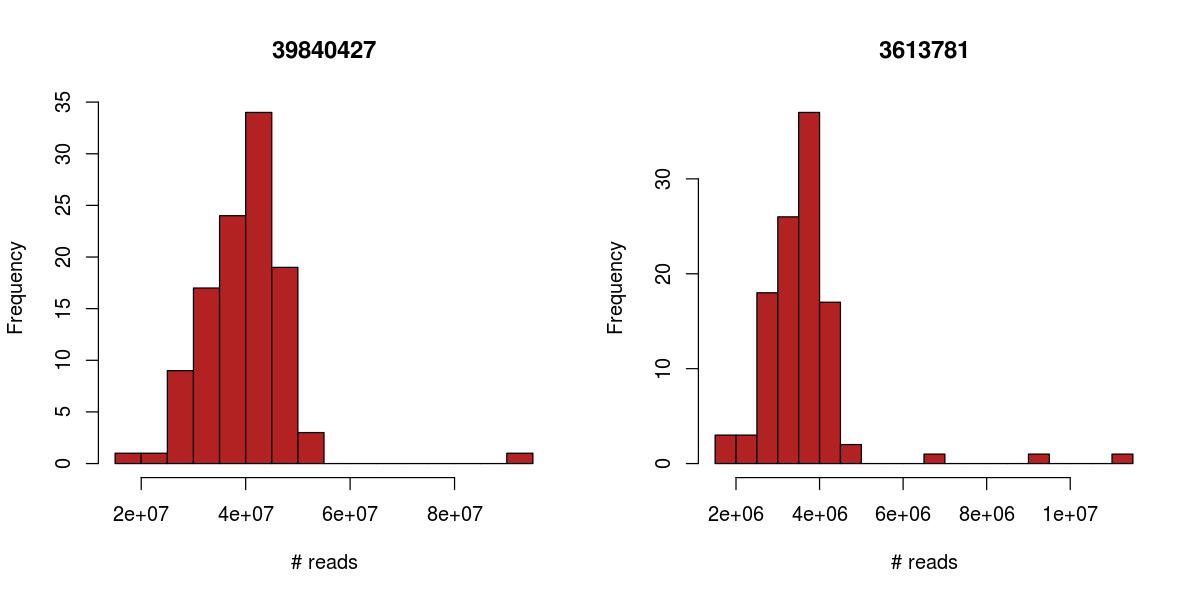

In [20]:
cpm_bulk_fewgenes_sc = cpm_bulk_allgenes_sc[rownames(cpm_bulk_allgenes_sc) %in% rownames(counts(sce0)),]
cpm_bulk_othergenes_sc = cpm_bulk_allgenes_sc[!(rownames(cpm_bulk_allgenes_sc) %in% rownames(counts(sce0))),]
par(mfrow = c(1,2))
hist(colSums(cpm_bulk_fewgenes_sc), main = round(mean(colSums(cpm_bulk_fewgenes_sc)), digits = 0), 
     col = "firebrick", breaks = 20, xlab = "# reads")
hist(colSums(cpm_bulk_othergenes_sc), main = round(mean(colSums(cpm_bulk_othergenes_sc)), digits = 0), 
     col = "firebrick", breaks = 20, xlab = "# reads")

[1] 39385

[1] 11231

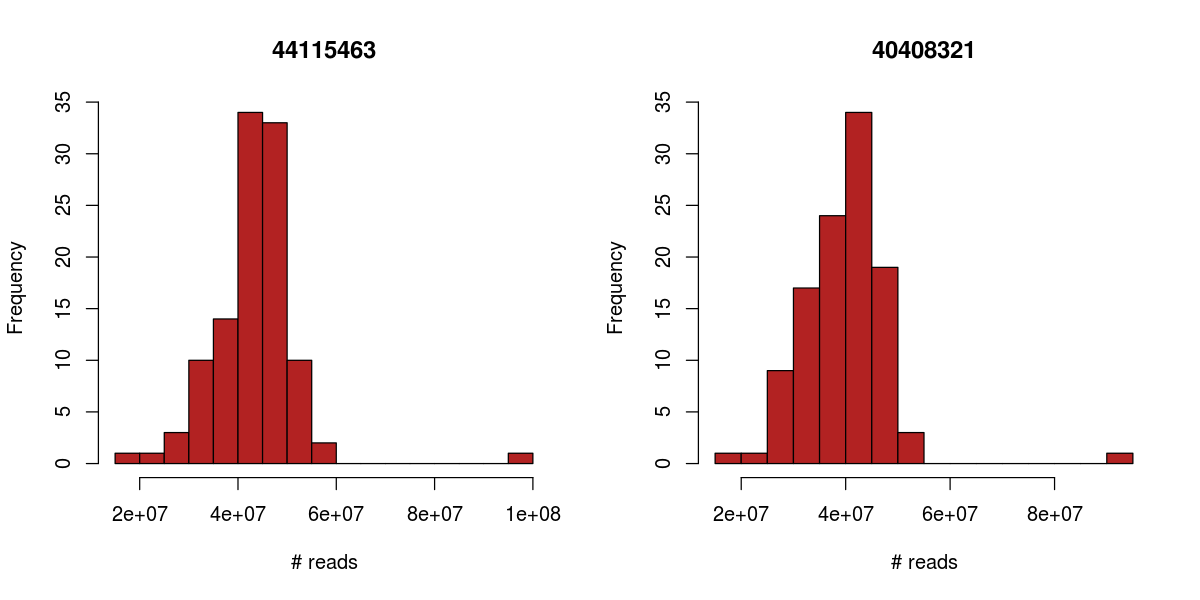

In [21]:
par(mfrow = c(1,2))
options(repr.plot.width = 10, repr.plot.height = 5)
hist(colSums(cpm_bulk_allgenes_sc), main = round(median(colSums(cpm_bulk_allgenes_sc)), digits = 0), 
     col = "firebrick", breaks = 20, xlab = "# reads")
hist(colSums(cpm_bulk_fewgenes_sc), main = round(median(colSums(cpm_bulk_fewgenes_sc)), digits = 0), 
     col = "firebrick", breaks = 20, xlab = "# reads")

nrow(cpm_bulk_allgenes_sc)
nrow(cpm_bulk_fewgenes_sc)

In [22]:
## get counts (bulk)

In [23]:
counts_bulk = counts(bulk)
# rename columns to match single cell long donor ids
newcols <- gsub(".*/quant_salmon/*","",colnames(counts_bulk))
cols <- gsub("*.hs.*","",newcols)
colnames(counts_bulk) <- cols

In [24]:
# select genes, donors we have single cell RNA-seq data for
counts_bulk_sc <- counts_bulk[rownames(counts_bulk) %in% rownames(counts(sce0)),
                                     colnames(counts_bulk) %in% unique(sce0$donor_long_id)]
# remove these 3 "bad" samples - quantification went wrong
counts_bulk_sc <- counts_bulk_sc[, !(colnames(counts_bulk_sc) %in% c("HPSI0713i-cicb_2",
                                                           "HPSI0713i-cicb_3",
                                                           "HPSI0513i-uoxz_5"))]

In [25]:
dim(counts_bulk_sc)

[1] 11231   108

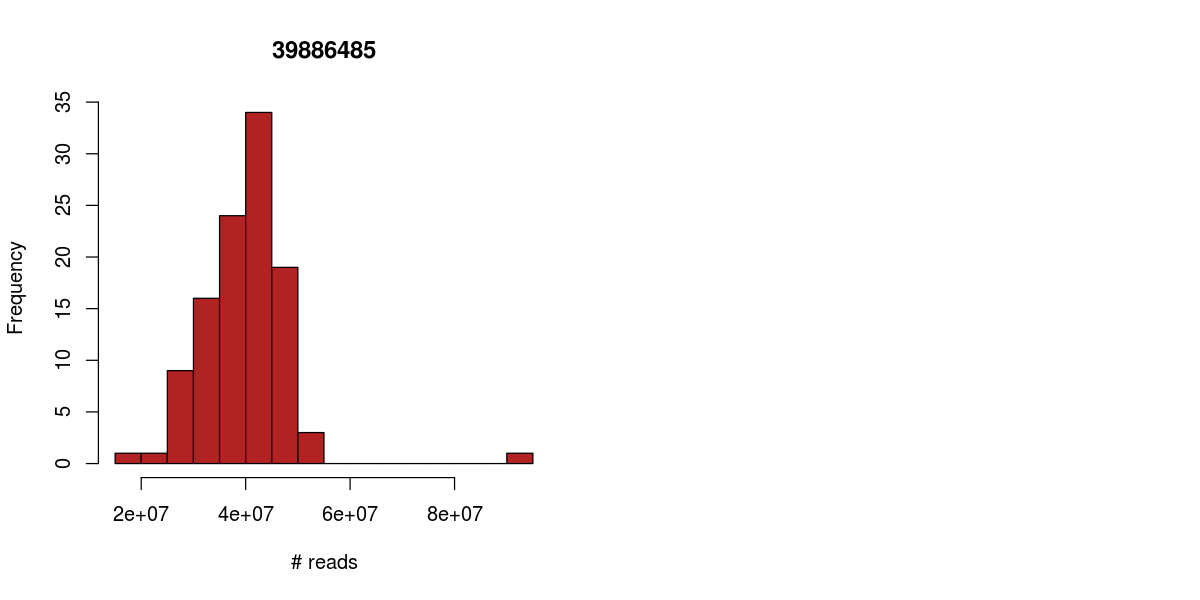

In [26]:
par(mfrow = c(1,2))
options(repr.plot.width = 10, repr.plot.height = 5)
hist(colSums(counts_bulk_sc), main = round(mean(colSums(counts_bulk_sc)), digits = 0), 
     col = "firebrick", breaks = 20, xlab = "# reads")

In [27]:
dim(counts(sce0))

[1] 11231  9661

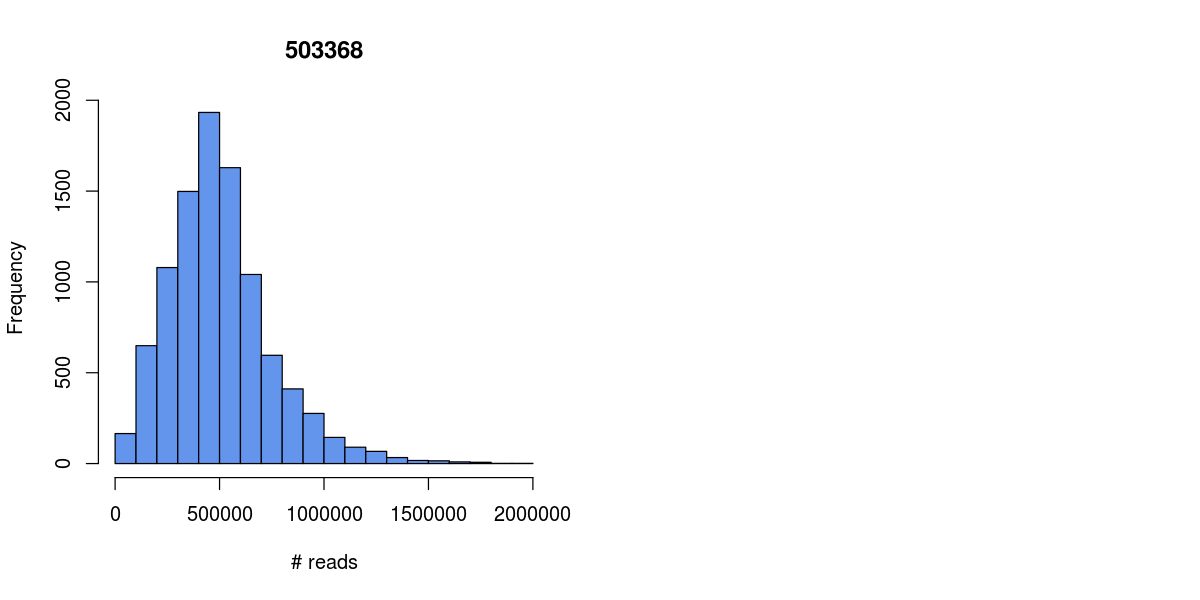

In [28]:
par(mfrow = c(1,2))
hist(colSums(counts(sce0)), main = round(mean(colSums(counts(sce0))), digits = 0), 
     col = "cornflowerblue", breaks = 20, xlab = "# reads")

In [1]:
get_sums <- function(sceset, ngenes){
    n = length(sceset$donor_short_id)
    sums <- matrix(0,nrow = ngenes, ncol = n)
    for (i in 1:n){
        don = unique(sceset$donor_short_id)[i]
        sc <- counts(sceset)[,sceset$donor_short_id == don]
        # print(length(sc))
        if (length(sc) == nrow(sceset)) {sums[,i] <- sc}
        else {sums[,i] <- rowSums(sc)}
    }
    rownames(sums) = rownames(sceset)
    colnames(sums) = unique(sceset$donor_short_id)
    sums
}

In [30]:
head(counts_bulk_sc)

,HPSI0114i-bezi_1,HPSI0114i-eipl_1,HPSI0114i-iisa_1,HPSI0114i-iisa_3,HPSI0114i-joxm_1,HPSI0114i-kolf_2,HPSI0114i-vass_1,HPSI0114i-zapk_3,HPSI0115i-aoxv_3,HPSI0115i-hecn_3,⋯,HPSI0414i-tout_1,HPSI0414i-walu_1,HPSI0514i-eoxi_6,HPSI0514i-pulk_1,HPSI0514i-tavh_2,HPSI0614i-guyj_2,HPSI0614i-zoio_2,HPSI0714i-fasu_2,HPSI0714i-oebj_1,HPSI0714i-oojs_1
ENSG00000000003_TSPAN6,3846.2563,2971.2791,2363.4024,3610.0986,2699.5453,3121.3161,3991.7219,1759.4262,5083.8218,603.59751,⋯,3535.2597,3268.3286,2847.5405,3716.3726,5160.1087,3220.6718,1502.99604,3091.9299,2695.8484,3668.9052
ENSG00000000419_DPM1,3096.4552,2679.1164,2721.3451,4253.0862,2784.7959,3567.5779,3860.2685,2654.8620,3894.1286,158.97065,⋯,3945.7600,3255.9831,2901.8728,3525.0015,4163.2263,4005.9988,1059.81348,3056.8984,3457.4752,3662.7717
ENSG00000000457_SCYL3,174.8060,192.8760,162.3068,274.0518,150.1757,130.4009,263.3381,151.2143,279.7222,42.97137,⋯,215.6370,189.3172,193.5155,186.3968,252.6376,214.7189,95.11626,164.4241,186.7144,229.2702
ENSG00000000460_C1orf112,642.4364,541.6634,764.2168,1234.7480,600.3225,910.3209,728.4518,750.7036,1160.3841,165.38003,⋯,798.5831,1257.5163,721.2034,894.3028,1499.0532,816.6356,555.25650,690.1226,730.8043,1131.7699
ENSG00000001036_FUCA2,1952.5207,1855.6722,1379.1091,2269.3795,1815.8049,1777.2460,2289.7128,1621.2768,2123.0012,391.79318,⋯,2456.7029,2354.4980,2136.4479,2425.8671,2901.7313,1972.0471,1040.51507,1612.7579,1691.5080,2106.8511
ENSG00000001084_GCLC,824.0389,853.9826,841.7446,1416.7016,915.0153,1336.3208,1077.2854,978.2410,1046.8201,140.71782,⋯,1069.4696,1127.5550,866.8565,984.8669,1181.8767,974.0582,403.13205,666.1630,710.5454,990.2644


In [ ]:
pseudobulk = get_sums(sce0, nrow(sce0))

In [ ]:
head(pseudobulk)

In [ ]:
dim(pseudobulk)

In [ ]:
par(mfrow = c(1,2))
hist(colSums(pseudobulk), main = round(mean(colSums(pseudobulk)), digits = 0), 
     col = "cornflowerblue", breaks = 20, xlab = "# reads")

In [ ]:
colSums(pseudobulk)

In [ ]:
BulkSeqDep = colSums(cpm_bulk_allgenes) # number of reads per donor (bulk sequencing depth)

In [ ]:
BulkRates = t(t(cpm_bulk_sc)/BulkSeqDep) # matrix of rates for each donor, gene (bulk) i.e. {bulk}ij / sum_j({bulk}ij)

In [ ]:
BulkSeqDep90 = BulkSeqDep*0.9
B90 = t(t(BulkRates)*BulkSeqDep90)

BulkSeqDep80 = BulkSeqDep*0.8
B80 = t(t(BulkRates)*BulkSeqDep80)

BulkSeqDep70 = BulkSeqDep*0.7
B70 = t(t(BulkRates)*BulkSeqDep70)

BulkSeqDep60 = BulkSeqDep*0.6
B60 = t(t(BulkRates)*BulkSeqDep60)

BulkSeqDep50 = BulkSeqDep*0.5
B50 = t(t(BulkRates)*BulkSeqDep50)

BulkSeqDep40 = BulkSeqDep*0.4
B40 = t(t(BulkRates)*BulkSeqDep40)

BulkSeqDep30 = BulkSeqDep*0.3
B30 = t(t(BulkRates)*BulkSeqDep30)

BulkSeqDep20 = BulkSeqDep*0.2
B20 = t(t(BulkRates)*BulkSeqDep20)

BulkSeqDep10 = BulkSeqDep*0.1
B10 = t(t(BulkRates)*BulkSeqDep10)

In [ ]:
par(mfrow=c(1,4))
options(repr.plot.width = 10, repr.plot.height = 3)
col = "firebrick"
hist(BulkSeqDep, main = round(mean(BulkSeqDep),digits = 0), col = col, breaks = 20, xlab = "# reads (genome-wide)", xlim = c(0,1e+8))
hist(BulkSeqDep90, main = round(mean(BulkSeqDep90),digits = 0), col = col, breaks = 20, xlab = "90% of # reads (genome-wide)", xlim = c(0,1e+8))
hist(BulkSeqDep80, main = round(mean(BulkSeqDep80),digits = 0), col = col, breaks = 20, xlab = "80% of # reads (genome-wide)", xlim = c(0,1e+8))
hist(BulkSeqDep70, main = round(mean(BulkSeqDep70),digits = 0), col = col, breaks = 20, xlab = "70% of # reads (genome-wide)", xlim = c(0,1e+8))
hist(BulkSeqDep60, main = round(mean(BulkSeqDep60),digits = 0), col = col, breaks = 20, xlab = "60% of # reads (genome-wide)", xlim = c(0,1e+8))
hist(BulkSeqDep50, main = round(mean(BulkSeqDep50),digits = 0), col = col, breaks = 20, xlab = "50% of # reads (genome-wide)", xlim = c(0,1e+8))
hist(BulkSeqDep40, main = round(mean(BulkSeqDep40),digits = 0), col = col, breaks = 20, xlab = "40% of # reads (genome-wide)", xlim = c(0,1e+8))
hist(BulkSeqDep30, main = round(mean(BulkSeqDep30),digits = 0), col = col, breaks = 20, xlab = "30% of # reads (genome-wide)", xlim = c(0,1e+8))
hist(BulkSeqDep20, main = round(mean(BulkSeqDep20),digits = 0), col = col, breaks = 20, xlab = "20% of # reads (genome-wide)", xlim = c(0,1e+8))
hist(BulkSeqDep10, main = round(mean(BulkSeqDep10),digits = 0), col = col, breaks = 20, xlab = "10% of # reads (genome-wide)", xlim = c(0,1e+8))

In [ ]:
a = colSums(cpm_bulk_allgenes) # number of reads per donor (bulk sequencing depth)
A = t(t(cpm_bulk_sc)/a) # matrix of rates for each donor, gene (bulk) i.e. {bulk}ij / sum_j({bulk}ij)
b = colSums(pseudobulk) # number of reads per donor (pseudobulk sequencing depth)
B = t(t(A)*b) # matrix of bulk rates by pseudobulk sequencing depths

In [ ]:
B60_pois = B60
for (j in 1:n_genes){
    B60_pois[j,] = rpois(n = ndonors, lambda = B60[j,])
}